# Mahesh Mane -226515
# Rohan Yarawad-226519

# Predict Stock Prices Using Random Forest Regression Model

- Pandas — a python library that loads the data file as a pandas data frame for analyzing the data.
- Matplotlib— a python package for plotting graphs.
- Scikit-learn — an open-source python library used in data analysis that supports machine learning models, pre-processing, model evaluation, and training utilities. It also acts as a sub-library for train_test_split, RandomForestRegressor, StandardScaler, RandomizedSearchCV, and metrics.
- Numpy— a python library that works with arrays.
- Yfinance — a python open-source library used to access financial data.

In [219]:
from pandas_datareader import data as pdr
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import yfinance as yf

In [220]:
data = yf.download("RELIANCE.NS", period='365d') #internet needed
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-10-29,2596.149902,2596.149902,2501.699951,2536.250000,2528.636963,6568539
2021-11-01,2536.250000,2556.000000,2494.100098,2537.800049,2530.182373,7144532
2021-11-02,2545.000000,2548.000000,2495.250000,2500.800049,2493.293457,4877652
2021-11-03,2506.050049,2520.000000,2461.000000,2483.600098,2476.145020,5533120
2021-11-04,2492.949951,2504.899902,2490.000000,2498.850098,2491.349365,787160
...,...,...,...,...,...,...
2023-04-13,2353.000000,2365.800049,2342.000000,2355.500000,2355.500000,5712541
2023-04-17,2424.949951,2424.949951,2349.050049,2367.449951,2367.449951,8274452
2023-04-18,2377.000000,2377.000000,2326.000000,2340.350098,2340.350098,4802172


In [221]:
data.reset_index(level=0,inplace=True)


In [222]:
data['Date']

0     2021-10-29
1     2021-11-01
2     2021-11-02
3     2021-11-03
4     2021-11-04
         ...    
360   2023-04-13
361   2023-04-17
362   2023-04-18
363   2023-04-19
364   2023-04-20
Name: Date, Length: 365, dtype: datetime64[ns]

In [223]:
print("Dataframe Shape: ", data. shape)
print("Null Value Present: ", data.isnull().values.any())

Dataframe Shape:  (365, 7)
Null Value Present:  False


In [224]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-10-29,2596.149902,2596.149902,2501.699951,2536.250000,2528.636963,6568539
1,2021-11-01,2536.250000,2556.000000,2494.100098,2537.800049,2530.182373,7144532
2,2021-11-02,2545.000000,2548.000000,2495.250000,2500.800049,2493.293457,4877652
3,2021-11-03,2506.050049,2520.000000,2461.000000,2483.600098,2476.145020,5533120
4,2021-11-04,2492.949951,2504.899902,2490.000000,2498.850098,2491.349365,787160
...,...,...,...,...,...,...,...
360,2023-04-13,2353.000000,2365.800049,2342.000000,2355.500000,2355.500000,5712541
361,2023-04-17,2424.949951,2424.949951,2349.050049,2367.449951,2367.449951,8274452
362,2023-04-18,2377.000000,2377.000000,2326.000000,2340.350098,2340.350098,4802172
363,2023-04-19,2339.050049,2357.899902,2332.199951,2352.000000,2352.000000,5664207


# Create a new column with the rolling mean of the Close price

In [225]:
data['Rolling Mean'] = data['Close'].rolling(window=20).mean()

# The Adjusted Close Value is the final output value that will be forecasted using the Machine Learning model. This figure indicates the stock’s closing price on that particular day of stock market trading.

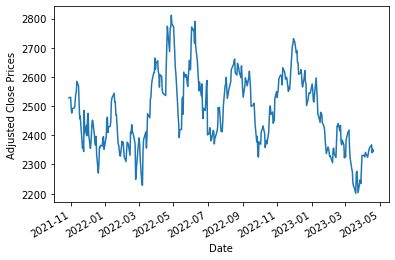

In [226]:
data.set_index("Date", inplace=True)
data['Adj Close'].plot()
plt.ylabel("Adjusted Close Prices")
plt.show()

<AxesSubplot:xlabel='Date'>

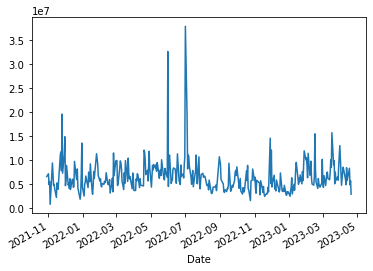

In [227]:
data['Volume'].plot()

In [228]:
data.corr()

,Open,High,Low,Close,Adj Close,Volume,Rolling Mean
Open,1.000000,0.982417,0.980713,0.958752,0.958587,-0.092148,0.754146
High,0.982417,1.000000,0.980032,0.985382,0.984293,-0.035992,0.760075
Low,0.980713,0.980032,1.000000,0.983565,0.984027,-0.162404,0.735170
Close,0.958752,0.985382,0.983565,1.000000,0.999578,-0.098528,0.727333
Adj Close,0.958587,0.984293,0.984027,0.999578,1.000000,-0.104646,0.728342
Volume,-0.092148,-0.035992,-0.162404,-0.098528,-0.104646,1.000000,0.016833
Rolling Mean,0.754146,0.760075,0.735170,0.727333,0.728342,0.016833,1.000000


# Create a scatter plot of the Close price and the Rolling Mean

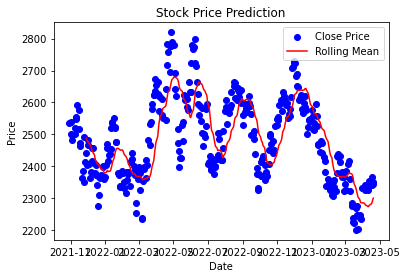

In [229]:
plt.scatter(data.index, data['Close'], color='blue', label='Close Price')
plt.plot(data['Rolling Mean'], color='red', label='Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price Prediction')
plt.legend()
plt.show()


scatter plot of the Close price and the Rolling Mean, which is a simple moving average of the Close price over a 20-day period. This plot can help identify trends and patterns in the data.

# Feature selection

In [230]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100,min_samples_split=100,random_state=1)
x = data.iloc[:, 0:5].values
y = data.iloc[:, 4].values

# Divide into train and test datasets.

In [231]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.26,  random_state=0)

# Scaling the features

In [232]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [240]:
x_train

array([[ 0.00869725,  0.03381243,  0.08055992, -0.00852017, -0.03350954],
       [ 1.34757082,  1.70611491,  1.51004367,  1.81184317,  1.79004354],
       [-0.70289316, -0.80460415, -0.84757031, -0.97821213, -1.00489949],
       ...,
       [ 2.07308213,  2.12135931,  2.1574298 ,  2.29745282,  2.27650302],
       [-0.24500058, -0.40785663, -0.36495823, -0.49184065, -0.51767642],
       [-0.50179152, -0.67965297, -0.57151253, -0.68333824, -0.70950871]])

In [241]:
x_test

array([[ 1.33480746,  1.2606709 ,  1.45186323,  1.3941359 ,  1.37160431],
       [ 0.98326671,  0.81484904,  0.98096692,  0.84978243,  0.8859477 ],
       [-0.5180351 , -0.35500734, -0.40400448, -0.17445868, -0.19973762],
       [-0.45460923, -0.575464  , -0.38604282, -0.47963293, -0.50544606],
       [-0.54819959, -0.53242995, -0.55550319, -0.61848871, -0.64454651],
       [-2.04137962, -1.76683832, -1.86433439, -1.61183055, -1.58740145],
       [-0.64101573, -0.77780164, -0.74761152, -0.67685254, -0.70301268],
       [-1.16929464, -1.02770402, -1.20835732, -0.92480663, -0.89710202],
       [-0.98907625, -0.70985256, -0.87568247, -0.55096816, -0.52148121],
       [ 0.17112549,  0.15763002,  0.24455418,  0.31076728,  0.28633821],
       [ 1.75673454,  2.1666587 ,  1.96766463,  2.24824198,  2.22720728],
       [ 1.09464533,  0.95791924,  0.72052764,  0.80972831,  0.78617342],
       [ 0.48051262,  0.45660673,  0.63072126,  0.64150063,  0.67667288],
       [ 0.62205761,  0.6227045 ,  0.2

# Hyperparemater tuning

# For a random forest regression model, the best parameters to consider are:

- n_estimators — number of trees in the forest
- max_depth — maximum depth in a tree
- min_samples_split — minimum number of data points before the sample is split
- min_samples_leaf — minimum number of leaf nodes that are required to be sampled
- bootstrap — sampling for data points, true or false
- random_state — generated random numbers for the random forest.

In [242]:
grid_rf = {
'n_estimators': [20, 50, 100, 500, 1000],  
'max_depth': np.arange(1, 15, 1),  
'min_samples_split': [2, 10, 9], 
'min_samples_leaf': np.arange(1, 15, 2, dtype=int),  
'bootstrap': [True, False], 
'random_state': [1, 2, 30, 42]
}
rscv = RandomizedSearchCV(estimator=model, param_distributions=grid_rf, cv=3, n_jobs=-1, verbose=2, n_iter=200)
rscv_fit = rscv.fit(x_train, y_train)
best_parameters = rscv_fit.best_params_
print(best_parameters)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
{'random_state': 30, 'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 11, 'bootstrap': False}


# Apply model and predict

In [243]:
model = RandomForestRegressor(n_estimators=150, random_state=42, min_samples_split=2, min_samples_leaf=1, max_depth=10, bootstrap=True)
model.fit(x_train, y_train)
predict = model.predict(x_test)
print(predict)
print(predict.shape)

[2656.19746745 2591.05499837 2449.25451823 2411.49601725 2392.18969076
 2257.60699707 2384.92692627 2358.40065755 2407.15949056 2513.54679525
 2765.22361654 2579.51341797 2562.48479655 2499.65131348 2526.41836426
 2568.37926107 2517.64355469 2613.23907552 2499.44700195 2605.16290365
 2566.31743327 2657.73221354 2370.30153592 2556.85164876 2441.41530762
 2603.09478825 2315.63537109 2323.30125    2547.51590658 2564.8253125
 2770.12189128 2615.56529188 2379.70077311 2358.98213379 2546.62738118
 2494.78008464 2366.00410482 2420.3207959  2557.53166178 2370.59500271
 2598.68408366 2477.47396322 2581.36664876 2599.05281261 2398.62357747
 2470.96676758 2584.04681315 2568.27525065 2449.15683105 2377.05816569
 2416.38125488 2499.73203613 2357.68391493 2523.32610677 2412.23105143
 2514.05247396 2528.2671875  2530.47632148 2341.60649089 2434.88074382
 2413.59388265 2720.89071777 2544.76012695 2588.10546061 2431.51451362
 2241.89306641 2513.6691276  2780.88486328 2497.56103516 2576.51615397
 2411.0

# Statistical metrics and performance evaluation

In [244]:
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, predict), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, predict), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predict)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, predict), 4))
print(f'Train Score : {model.score(x_train, y_train) * 100:.2f}% and Test Score : {model.score(x_test, y_test) * 100:.2f}% using Random Tree Regressor.')
errors = abs(predict - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Mean Absolute Error: 1.8811
Mean Squared Error: 16.2178
Root Mean Squared Error: 4.0271
(R^2) Score: 0.9988
Train Score : 99.99% and Test Score : 99.88% using Random Tree Regressor.
Accuracy: 99.93 %.


In [245]:
from pandas import read_csv
predictions = pd.DataFrame({"Predictions": predict}, index=pd.date_range(start=data.index[-1], periods=len(predict), freq="D"))
predictions.to_csv("Predicted-price-data.csv")
#colllects future days from predicted values
oneyear_df = pd.DataFrame(predictions[:252])
oneyear_df.to_csv("one-year-predictions.csv")
onemonth_df = pd.DataFrame(predictions[:21])
onemonth_df.to_csv("one-month-predictions.csv")


Buy price and date
    Unnamed: 0  Predictions
65  2023-06-24  2241.893066
Sell price and date
    Unnamed: 0  Predictions
67  2023-06-26  2780.884863


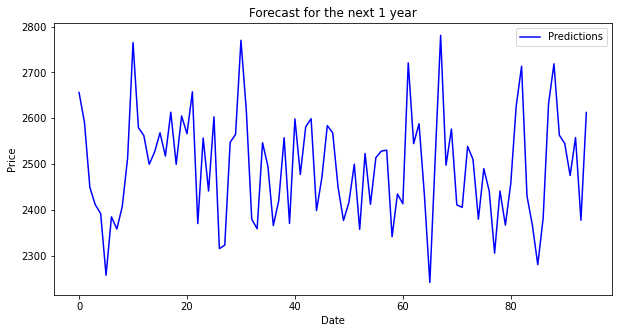

In [246]:
oneyear_df_pred = pd.read_csv("one-year-predictions.csv")
buy_price = min(oneyear_df_pred["Predictions"])
sell_price = max(oneyear_df_pred["Predictions"])
oneyear_buy = oneyear_df_pred.loc[oneyear_df_pred["Predictions"] == buy_price]
oneyear_sell = oneyear_df_pred.loc[oneyear_df_pred["Predictions"] == sell_price]
print("Buy price and date")
print(oneyear_buy)
print("Sell price and date")
print(oneyear_sell)
oneyear_df_pred["Predictions"].plot(figsize=(10, 5), title="Forecast for the next 1 year", color="blue")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

Buy price and date
   Unnamed: 0  Predictions
5  2023-04-25  2257.606997
Sell price and date
    Unnamed: 0  Predictions
10  2023-04-30  2765.223617


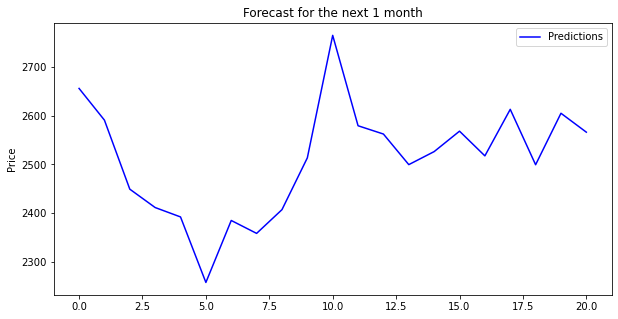

In [247]:
onemonth_df_pred = pd.read_csv("one-month-predictions.csv")

buy_price = min(onemonth_df_pred["Predictions"])
sell_price = max(onemonth_df_pred["Predictions"])
onemonth_buy = onemonth_df_pred.loc[onemonth_df_pred["Predictions"] == buy_price]
onemonth_sell = onemonth_df_pred.loc[onemonth_df_pred["Predictions"] == sell_price]
print("Buy price and date")
print(onemonth_buy)
print("Sell price and date")
print(onemonth_sell)
onemonth_df_pred["Predictions"].plot(figsize=(10, 5), title="Forecast for the next 1 month", color="blue")

plt.ylabel("Price")
plt.legend()
plt.show()

# Conclusion
There are different approaches to solving these problems. Their performance can differ from mathematical analysis for prediction to sentiment analysis, financial news articles, and expert reviews. However, because of how fickle the stock market is, there are no perfect or accurate prediction systems. The algorithm is also a great choice for anyone who needs to develop a model quickly. It provides a pretty good indicator of the importance it assigns to your features. Overall, random forest is mostly fast, simple, and flexible, but not without some limitations.